In [5]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

## Lesson 15: Sampling 

In [6]:
united = Table.read_table('data/united.csv')
united = united.with_column('Row', np.arange(united.num_rows)).move_to_start('Row')
united

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


## Non-Random (Deterministic) Sampling ##

In [7]:
united.where('Destination', 'JFK') 

Row,Date,Flight Number,Destination,Delay
26,6/1/15,502,JFK,-4
33,6/1/15,637,JFK,141
39,6/1/15,704,JFK,-8
50,6/1/15,758,JFK,-5
51,6/1/15,760,JFK,352
56,6/1/15,824,JFK,3
57,6/1/15,898,JFK,290
179,6/2/15,502,JFK,0
188,6/2/15,637,JFK,202
194,6/2/15,704,JFK,-11


In [8]:
united.take(np.arange(0, united.num_rows, 1000))

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1000,6/7/15,1692,EWR,7
2000,6/14/15,824,JFK,-1
3000,6/21/15,217,EWR,5
4000,6/27/15,1401,SAN,-4
5000,7/4/15,1614,LAS,-2
6000,7/11/15,401,CLE,4
7000,7/17/15,1645,IAD,0
8000,7/24/15,624,ORD,61
9000,7/30/15,1728,ORD,209


In [9]:
united.take(make_array(34, 6321, 10040))

Row,Date,Flight Number,Destination,Delay
34,6/1/15,650,AUS,44
6321,7/13/15,1124,SEA,-7
10040,8/6/15,1216,LAS,2


## Random Sample

### Systematic Sample

In [10]:
start = np.random.choice(np.arange(1000))
systematic_sample = united.take(np.arange(start, united.num_rows, 1000))
systematic_sample.show()

Row,Date,Flight Number,Destination,Delay
92,6/1/15,1267,SAN,-1
1092,6/8/15,864,BOS,-3
2092,6/15/15,222,LAX,-1
3092,6/21/15,1460,EWR,0
4092,6/28/15,500,EWR,54
5092,7/5/15,1060,IAH,-7
6092,7/11/15,1912,BOS,0
7092,7/18/15,758,JFK,5
8092,7/24/15,1742,EWR,183
9092,7/31/15,1038,LAS,12


### Simple Random Sample

In [11]:
united.sample(20)

Row,Date,Flight Number,Destination,Delay
4730,7/2/15,1149,EWR,1
10475,8/9/15,1038,LAS,-4
6617,7/15/15,721,EWR,-6
1418,6/10/15,1122,HNL,5
1296,6/9/15,1583,EWR,10
11265,8/14/15,691,SAN,0
2133,6/15/15,637,JFK,75
4466,6/30/15,1608,EWR,99
11373,8/14/15,1947,BWI,0
6972,7/17/15,1247,SAN,114


In [12]:
united.sample(20, with_replacement=False)

Row,Date,Flight Number,Destination,Delay
13210,8/27/15,1602,ATL,-4
7820,7/23/15,477,ORD,-3
4986,7/4/15,1159,CLE,-1
1573,6/11/15,1111,EWR,3
7350,7/20/15,579,DEN,-3
2375,6/16/15,1725,OGG,-2
5966,7/10/15,1946,BOS,-5
6545,7/14/15,1751,LAS,0
11007,8/12/15,1670,HNL,5
7666,7/22/15,525,LAS,29


## Distributions ##

In [13]:
dice = Table().with_column('Face', np.arange(1, 7))
dice

Face
1
2
3
4
5
6


In [14]:
dice.sample(10)

Face
4
2
3
2
1
5
1
5
1
1


In [15]:
roll_bins = np.arange(0.5, 6.6, 1)

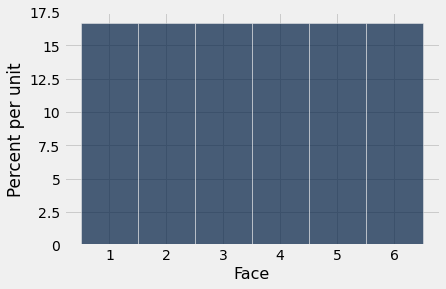

In [16]:
dice.hist(bins=roll_bins)

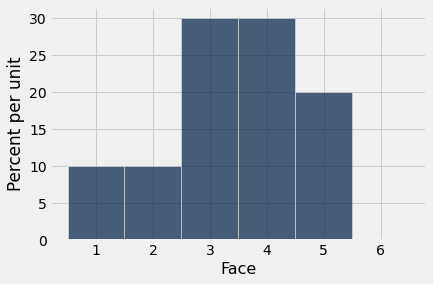

In [17]:
dice.sample(10).hist(bins=roll_bins)

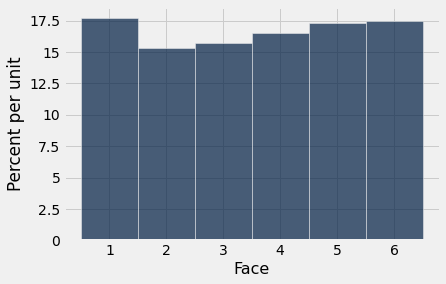

In [18]:
dice.sample(1000).hist(bins=roll_bins)

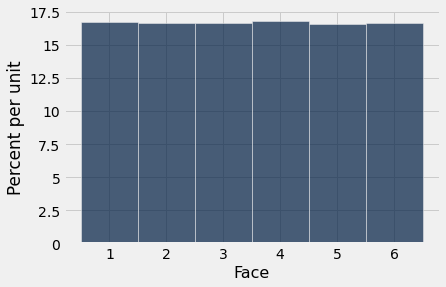

In [19]:
dice.sample(100000).hist(bins=roll_bins)

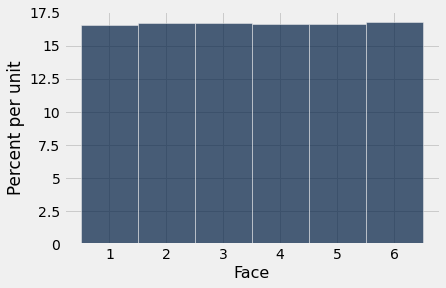

In [20]:
dice.sample(1000000).hist(bins=roll_bins)

## Large Random Samples ##

In [22]:
#Start here 10/19
united 

Row,Date,Flight Number,Destination,Delay
0,6/1/15,73,HNL,257
1,6/1/15,217,EWR,28
2,6/1/15,237,STL,-3
3,6/1/15,250,SAN,0
4,6/1/15,267,PHL,64
5,6/1/15,273,SEA,-6
6,6/1/15,278,SEA,-8
7,6/1/15,292,EWR,12
8,6/1/15,300,HNL,20
9,6/1/15,317,IND,-10


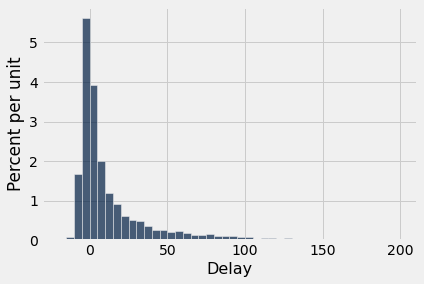

In [23]:
united_bins = np.arange(-20, 201, 5)
united.hist('Delay', bins = united_bins)

In [24]:
min(united.column('Delay'))

-16

In [25]:
max(united.column('Delay'))

580

In [26]:
np.average(united.column('Delay'))

16.658155515370705

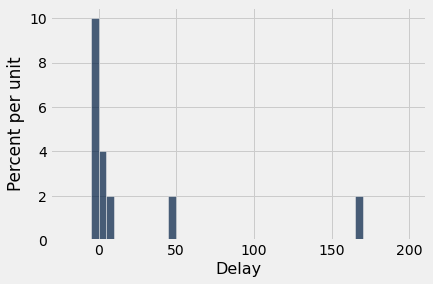

In [27]:
united.sample(10).hist('Delay', bins = united_bins)

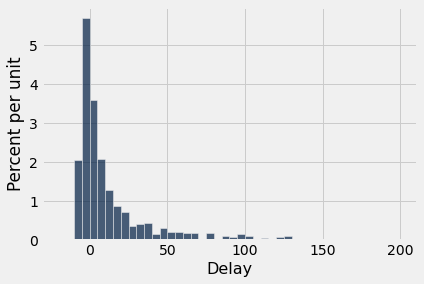

In [30]:
united.sample(1000).hist('Delay', bins = united_bins)